In [1]:
import plotly.express as px
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point,Polygon
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

In [13]:
myShapefile = gpd.read_file ('C:/Users/vasuk/OneDrive/Desktop/Data mining/States_shapefile.shp')
myShapefile

,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
1,2,None,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
3,4,PDS,AR,ARKANSAS,F,922,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
4,5,None,CA,CALIFORNIA,N,923,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."
5,6,ECOMAP,CO,COLORADO,F,924,"POLYGON ((-102.04446 37.64147, -102.04201 37.3..."
6,7,SIMS,CT,CONNECTICUT,F,925,"POLYGON ((-73.53039 41.52275, -73.51715 41.665..."
7,8,None,DE,DELAWARE,P,926,"POLYGON ((-75.70707 38.55759, -75.71071 38.649..."
8,9,None,DC,DISTRICT OF COLUMBIA,P,927,"POLYGON ((-77.00793 38.96667, -76.91090 38.890..."
9,10,None,FL,FLORIDA,P,928,"MULTIPOLYGON (((-80.78566 28.78519, -80.76242 ..."


<AxesSubplot: >

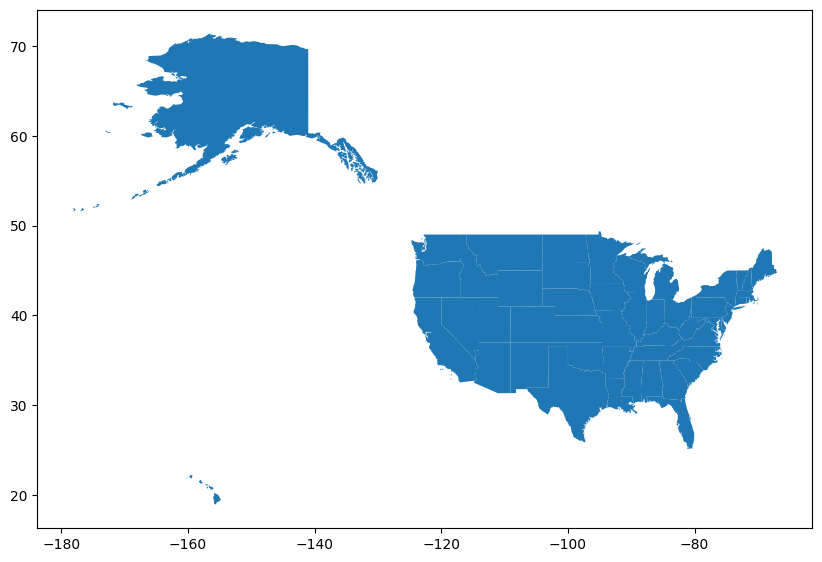

In [24]:
fig,ax = plt.subplots(figsize = (10,10))
myShapefile.plot(ax=ax)

In [15]:
myShapefile.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         51 non-null     int64   
 1   Program     27 non-null     object  
 2   State_Code  51 non-null     object  
 3   State_Name  51 non-null     object  
 4   Flowing_St  51 non-null     object  
 5   FID_1       51 non-null     int64   
 6   geometry    51 non-null     geometry
dtypes: geometry(1), int64(2), object(4)
memory usage: 2.9+ KB


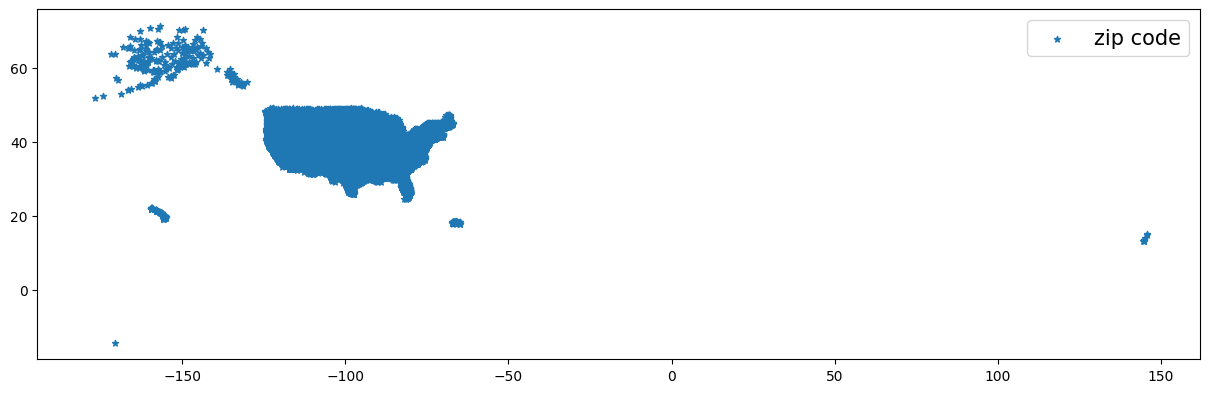

In [28]:
fig,ax = plt.subplots(figsize= (15,15))
myShapefile.plot(ax = ax, alpha = 1, color="white")
geo_df.plot(ax=ax, markersize=20 , marker="*", label="zip code")
plt.legend(prop={'size': 15})

In [24]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.cluster import KMeans


In [25]:
df= pd.read_csv('C:/Users/vasuk/OneDrive/Desktop/Data mining/zip.csv')
df.head()

,ZIP,LAT,LNG
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158345,-66.932911
4,610,18.295366,-67.125135


In [26]:
df.shape

(33144, 3)

In [27]:
df.dropna(axis=0,how='any',subset=['LNG','LAT'],inplace=True)

In [28]:
X=df.loc[:,['ZIP','LAT','LNG']]
X.head(10)

,ZIP,LAT,LNG
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158345,-66.932911
4,610,18.295366,-67.125135
5,612,18.402253,-66.711397
6,616,18.420412,-66.671979
7,617,18.445147,-66.559696
8,622,17.991245,-67.153993
9,623,18.083361,-67.153897


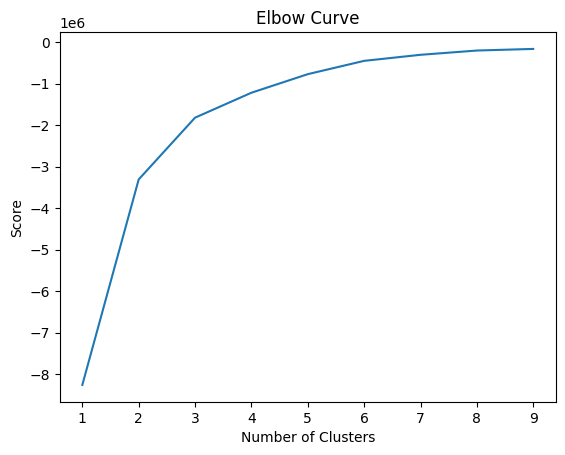

In [29]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['LNG']]
X_axis = df[['LAT']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))] # Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [31]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,ZIP,LAT,LNG,cluster_label
0,601,18.180555,-66.749961,0
1,602,18.361945,-67.175597,0
2,603,18.455183,-67.119887,0
3,606,18.158345,-66.932911,0
4,610,18.295366,-67.125135,0
5,612,18.402253,-66.711397,0
6,616,18.420412,-66.671979,0
7,617,18.445147,-66.559696,0
8,622,17.991245,-67.153993,0
9,623,18.083361,-67.153897,0


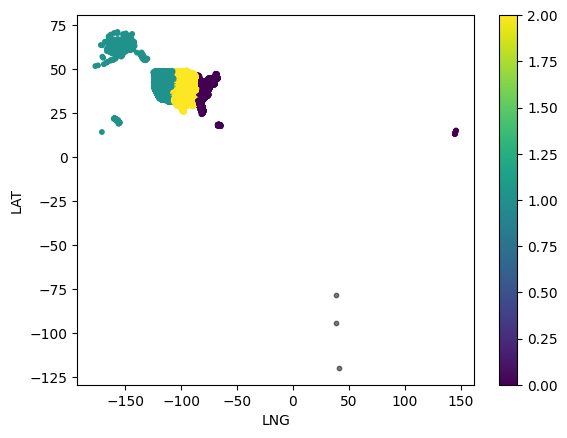

In [36]:
X.plot.scatter(x = 'LNG', y = 'LAT', c=labels, s=10, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=10, alpha=0.5)